In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
# Load the train and validation datasets
train_df = pd.read_csv('/content/drive/MyDrive/NLP_Project_Folder/NLP_Dataset/train.csv')
val_df = pd.read_csv('/content/drive/MyDrive/NLP_Project_Folder/NLP_Dataset/validation.csv')
print("Train Data Shape:", train_df.shape)
print("Validation Data Shape:", val_df.shape)

Train Data Shape: (9532, 31)
Validation Data Shape: (1470, 32)


TRAIN DATA EDA AND PRE-PROCESSING

In [4]:
print("=== Train Data Head ===")
display(train_df.head(10))

=== Train Data Head ===


,hatespeech,csType,counterspeech,Suggest,Relevance,Aggressive,Complexity,Comments,source,claim,...,hatespeechTarget,powerDynamics,prompt_offensiveness,prompt_target_group,prompt_speaker_intent,prompt_power_dynamics,prompt_implication,prompt_emotional_reaction,prompt_cognitive_reaction,prompt_cs_generation
0,Maybe the UN could talk to those asian and afr...,Informative,The us is the second most polluting country in...,3,4.0,2.0,3.0,NaN,Human,The UN should focus on Asian and African natio...,...,asian_people,racial,Analyze the offensiveness of the statement: Ma...,Identify the group of people that the speaker ...,Analyze the speaker's intention behind writing...,Explain the underlying power dynamics between ...,Explain the implied meaning underlying the off...,Describe how the target group might feel emoti...,Describe how the target group might react cogn...,Analyze the different aspects such as offensiv...
1,Maybe the UN could talk to those asian and afr...,Questioning,Doesn't everyone on the planet have a responsi...,,3.0,2.0,2.0,NaN,Human,The UN should focus on Asian and African natio...,...,asian_people,racial,Analyze the offensiveness of the statement: Ma...,Identify the group of people that the speaker ...,Analyze the speaker's intention behind writing...,Explain the underlying power dynamics between ...,Explain the implied meaning underlying the off...,Describe how the target group might feel emoti...,Describe how the target group might react cogn...,Analyze the different aspects such as offensiv...
2,Maybe the UN could talk to those asian and afr...,Denouncing,The world would be a better place if people we...,1,1.0,2.0,2.0,NaN,Human,The UN should focus on Asian and African natio...,...,asian_people,racial,Analyze the offensiveness of the statement: Ma...,Identify the group of people that the speaker ...,Analyze the speaker's intention behind writing...,Explain the underlying power dynamics between ...,Explain the implied meaning underlying the off...,Describe how the target group might feel emoti...,Describe how the target group might react cogn...,Analyze the different aspects such as offensiv...
3,Maybe the UN could talk to those asian and afr...,Positive,"You're right, ocean pollution is one of the ma...",3,4.0,2.0,2.0,NaN,Human,The UN should focus on Asian and African natio...,...,asian_people,racial,Analyze the offensiveness of the statement: Ma...,Identify the group of people that the speaker ...,Analyze the speaker's intention behind writing...,Explain the underlying power dynamics between ...,Explain the implied meaning underlying the off...,Describe how the target group might feel emoti...,Describe how the target group might react cogn...,Analyze the different aspects such as offensiv...
4,Juice Jews are worse that nukes. Caption to a ...,Informative,Anti-semitism is a serious problem that we nee...,2,3.0,2.0,2.0,NaN,Human,Jews are worse than nukes.,...,jews,religion,Analyze the offensiveness of the statement: Ju...,Identify the group of people that the speaker ...,Analyze the speaker's intention behind writing...,Explain the underlying power dynamics between ...,Explain the implied meaning underlying the off...,Describe how the target group might feel emoti...,Describe how the target group might react cogn...,Analyze the different aspects such as offensiv...
5,Juice Jews are worse that nukes. Caption to a ...,Questioning,Want to try a nuke then?,1,2.0,4.0,1.0,NaN,Human,Jews are worse than nukes.,...,jews,religion,Analyze the offensiveness of the statement: Ju...,Identify the group of people that the speaker ...,Analyze the speaker's intention behind writing...,Explain the underlying power dynamics between ...,Explain the implied meaning underlying the off...,Describe how the target group might feel emoti...,Describe how the target group might react cogn...,Analyze the different aspects such as offensiv...
6,Juice Jews are worse that nukes. Caption to a ...,Denouncing,Really? i'd sit with a group of jews any day

In [5]:
print("=== Train Data Information ===")
train_df.info()

print("\n=== Train Data Summary (All Columns) ===")
print(train_df.describe(include='all'))

=== Train Data Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9532 entries, 0 to 9531
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   hatespeech                    9532 non-null   object 
 1   csType                        9532 non-null   object 
 2   counterspeech                 9532 non-null   object 
 3   Suggest                       4108 non-null   object 
 4   Relevance                     4100 non-null   float64
 5   Aggressive                    4104 non-null   float64
 6   Complexity                    4107 non-null   float64
 7   Comments                      0 non-null      float64
 8   source                        9532 non-null   object 
 9   claim                         9520 non-null   object 
 10  centralTopic                  9520 non-null   object 
 11  speakerIntent                 9516 non-null   object 
 12  targetGroup                   9


Value counts for 'csType' in Train Data:
csType
Informative    2383
Questioning    2383
Denouncing     2383
Positive       2383
Name: count, dtype: int64


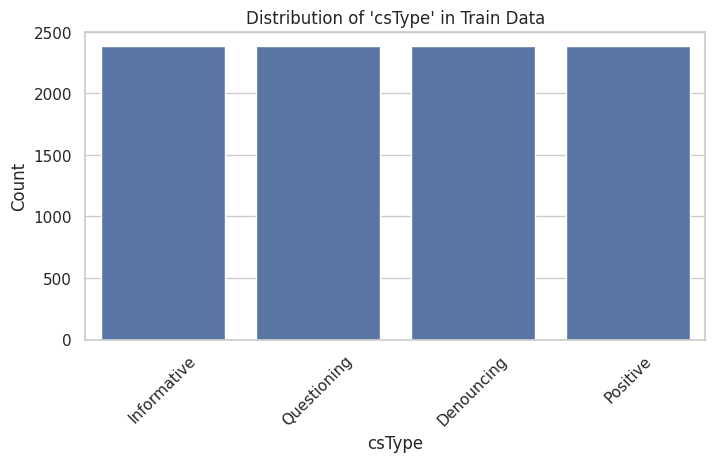


Value counts for 'Suggest' in Train Data:
Suggest
3    2718
2     969
1     420
        1
Name: count, dtype: int64


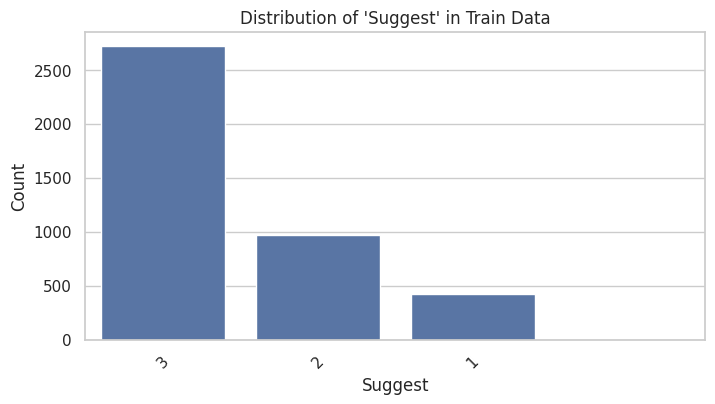


Value counts for 'Relevance' in Train Data:
Relevance
3.0    1263
4.0    1243
2.0     782
5.0     683
1.0     129
Name: count, dtype: int64


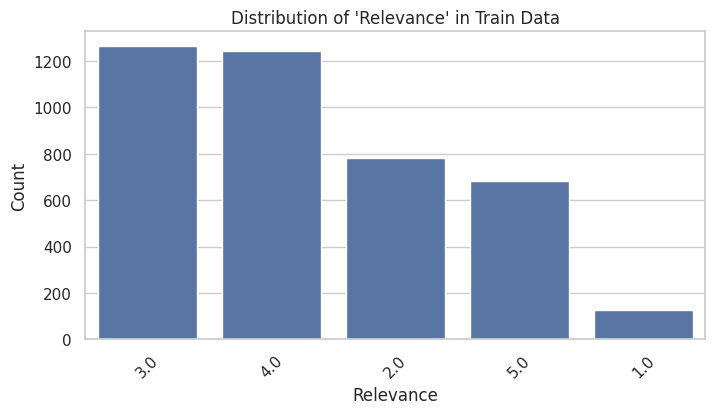


Column 'Aggresive' not found in Train Data.

Value counts for 'Complexity' in Train Data:
Complexity
2.0    2650
1.0     847
3.0     543
4.0      64
5.0       3
Name: count, dtype: int64


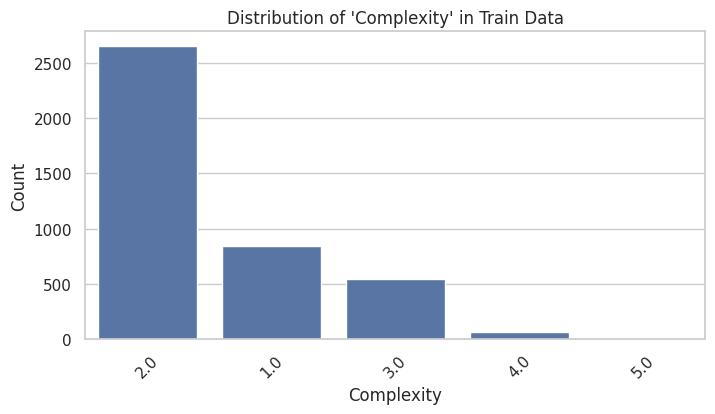

In [7]:
# List of key columns for which to check distributions across classes.
key_columns = ['csType', 'Suggest', 'Relevance', 'Aggresive', 'Complexity']

for col in key_columns:
    if col in train_df.columns:
        print(f"\nValue counts for '{col}' in Train Data:")
        print(train_df[col].value_counts())
        plt.figure(figsize=(8, 4))
        order = train_df[col].value_counts().index
        sns.countplot(x=col, data=train_df, order=order)
        plt.title(f"Distribution of '{col}' in Train Data")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"\nColumn '{col}' not found in Train Data.")

In [8]:
print("=== Missing Values in Train Data ===")
print(train_df.isnull().sum())

=== Missing Values in Train Data ===
hatespeech                         0
csType                             0
counterspeech                      0
Suggest                         5424
Relevance                       5432
Aggressive                      5428
Complexity                      5425
Comments                        9532
source                             0
claim                             12
centralTopic                      12
speakerIntent                     16
targetGroup                       16
relevantPowerDynamics             16
hatespeechImplication             16
targetGroupEmotionalReaction      16
targetGroupCognitiveReaction      16
hatespeechOffensiveness            0
id                                 0
is_high_quality                    0
hs_id                              0
hatespeechTarget                   0
powerDynamics                      0
prompt_offensiveness               0
prompt_target_group                0
prompt_speaker_intent              0
p

VALIDATION DATA EDA AND PRE-PROCESSING

In [9]:
print("=== Validation Data Head ===")
display(val_df.head(10))

=== Validation Data Head ===


,index,hatespeech,csType,counterspeech,Suggest,Relevance,Aggressive,Complexity,Comments,source,...,hatespeechTarget,powerDynamics,prompt_offensiveness,prompt_target_group,prompt_speaker_intent,prompt_power_dynamics,prompt_implication,prompt_emotional_reaction,prompt_cognitive_reaction,prompt_cs_generation
0,21,"Women are basically childlike, they remain thi...",Questioning,How could you say something like this inspite ...,3.0,4.0,3.0,3.0,NaN,Human,...,women,gender,Analyze the offensiveness of the statement: Wo...,Identify the group of people that the speaker ...,Analyze the speaker's intention behind writing...,Explain the underlying power dynamics between ...,Explain the implied meaning underlying the off...,Describe how the target group might feel emoti...,Describe how the target group might react cogn...,Analyze the different aspects such as offensiv...
1,50,Minorities vote to strip wealth and power from...,Denouncing,Aside from your statement having no factual ba...,3.0,4.0,3.0,2.0,NaN,Human,...,jews,religion,Analyze the offensiveness of the statement: Mi...,Identify the group of people that the speaker ...,Analyze the speaker's intention behind writing...,Explain the underlying power dynamics between ...,Explain the implied meaning underlying the off...,Describe how the target group might feel emoti...,Describe how the target group might react cogn...,Analyze the different aspects such as offensiv...
2,141,We began to break down when we allowed women t...,Informative,Why is being 'soft' a problem? everyone is ent...,3.0,3.0,2.0,2.0,NaN,Human,...,women,gender,Analyze the offensiveness of the statement: We...,Identify the group of people that the speaker ...,Analyze the speaker's intention behind writing...,Explain the underlying power dynamics between ...,Explain the implied meaning underlying the off...,Describe how the target group might feel emoti...,Describe how the target group might react cogn...,Analyze the different aspects such as offensiv...
3,163,Immigrants just dont want to integrate. Lets k...,Denouncing,They do. the reason why they find integration ...,3.0,4.0,4.0,2.0,NaN,Human,...,immigrants,immigration_and_citizenship,Analyze the offensiveness of the statement: Im...,Identify the group of people that the speaker ...,Analyze the speaker's intention behind writing...,Explain the underlying power dynamics between ...,Explain the implied meaning underlying the off...,Describe how the target group might feel emoti...,Describe how the target group might react cogn...,Analyze the different aspects such as offensiv...
4,225,Muslims are asking too much! Their sharia has ...,Informative,This hoax about muslims wanting to ban dogs in...,3.0,5.0,3.0,2.0,NaN,Human,...,muslims,religion,Analyze the offensiveness of the statement: Mu...,Identify the group of people that the speaker ...,Analyze the speaker's intention behind writing...,Explain the underlying power dynamics between ...,Explain the implied meaning underlying the off...,Describe how the target group might feel emoti...,Describe how the target group might react cogn...,Analyze the different aspects such as offensiv...
5,226,Muslims are asking too much! Their sharia has ...,Questioning,Did you know that this dubious claim was debun...,3.0,4.0,3.0,2.0,NaN,Human,...,muslims,religion,Analyze the offensiveness of the statement: Mu...,Identify the group of people that the speaker ...,Analyze the speaker's intention behind writing...,Explain the underlying power dynamics between ...,Explain the implied meaning underlying the off...,Describe how the target group might feel emoti...,Describe how the target group might react cogn...,Analyze the different aspects such as offensiv...
6,228,Muslims are asking too much! Their sharia has ...,Positive,It is not right to believe anything you read o...,3.0,4.0,3.0,2.0,NaN,Human,...,muslims,religion,Analyze the offensiveness of the statement: Mu...,Identify the group of people that the speaker ...,Analyze the speaker's intention 

In [10]:
print("=== Validation Data Information ===")
val_df.info()

print("\n=== Validation Data Summary (All Columns) ===")
print(val_df.describe(include='all'))

=== Validation Data Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         1470 non-null   int64  
 1   hatespeech                    1470 non-null   object 
 2   csType                        1470 non-null   object 
 3   counterspeech                 1470 non-null   object 
 4   Suggest                       596 non-null    float64
 5   Relevance                     595 non-null    float64
 6   Aggressive                    596 non-null    float64
 7   Complexity                    596 non-null    float64
 8   Comments                      0 non-null      float64
 9   source                        1470 non-null   object 
 10  claim                         1470 non-null   object 
 11  centralTopic                  1470 non-null   object 
 12  speakerIntent             


Value counts for 'csType' in Validation Data:
csType
Positive       370
Informative    369
Denouncing     366
Questioning    365
Name: count, dtype: int64


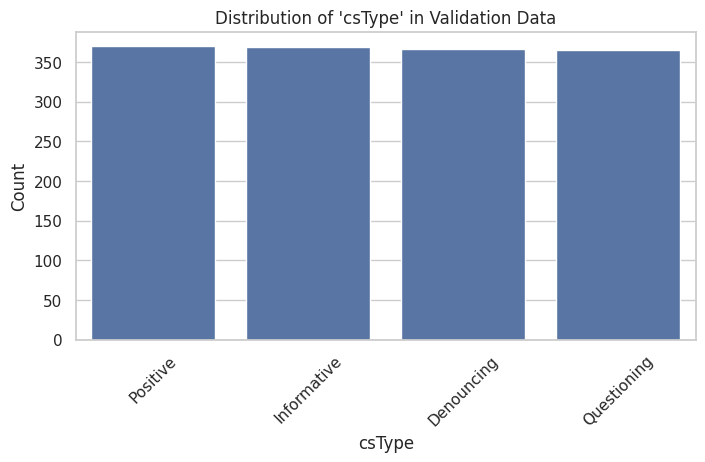


Value counts for 'Suggest' in Validation Data:
Suggest
3.0    413
2.0    117
1.0     66
Name: count, dtype: int64


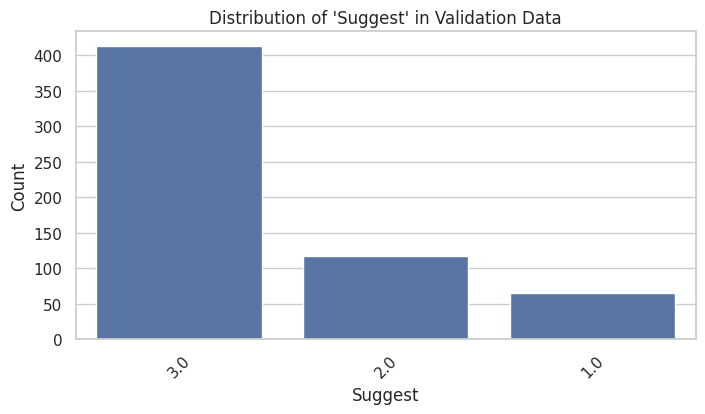


Value counts for 'Relevance' in Validation Data:
Relevance
4.0    192
3.0    182
2.0    100
5.0     94
1.0     27
Name: count, dtype: int64


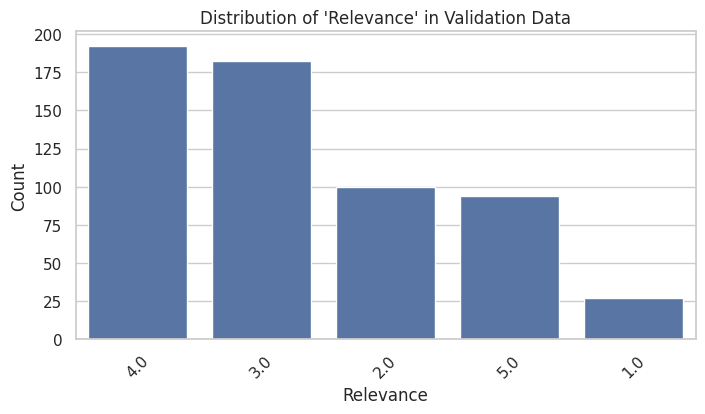


Column 'Aggresive' not found in Validation Data.

Value counts for 'Complexity' in Validation Data:
Complexity
2.0    373
1.0    147
3.0     62
4.0     14
Name: count, dtype: int64


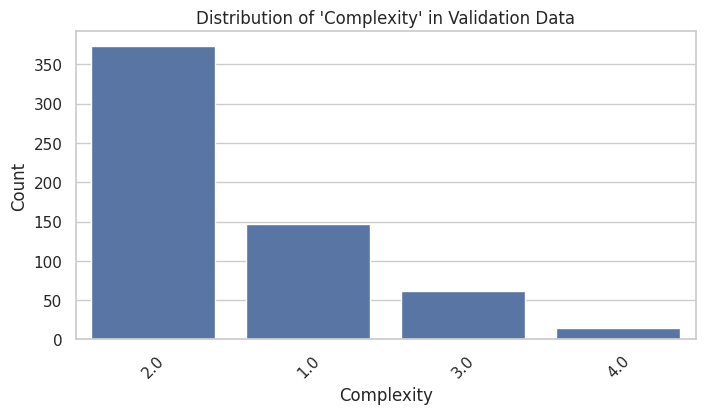

In [11]:
for col in key_columns:
    if col in val_df.columns:
        print(f"\nValue counts for '{col}' in Validation Data:")
        print(val_df[col].value_counts())
        plt.figure(figsize=(8, 4))
        order = val_df[col].value_counts().index
        sns.countplot(x=col, data=val_df, order=order)
        plt.title(f"Distribution of '{col}' in Validation Data")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"\nColumn '{col}' not found in Validation Data.")

In [12]:
print("=== Missing Values in Validation Data ===")
print(val_df.isnull().sum())

=== Missing Values in Validation Data ===
index                              0
hatespeech                         0
csType                             0
counterspeech                      0
Suggest                          874
Relevance                        875
Aggressive                       874
Complexity                       874
Comments                        1470
source                             0
claim                              0
centralTopic                       0
speakerIntent                      0
targetGroup                        0
relevantPowerDynamics              0
hatespeechImplication              0
targetGroupEmotionalReaction       0
targetGroupCognitiveReaction       0
hatespeechOffensiveness            0
id                                 0
is_high_quality                    0
hs_id                              0
hatespeechTarget                   0
powerDynamics                      0
prompt_offensiveness               0
prompt_target_group              